     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target flower_name
0                  5.1               3.5                1.4               0.2       0      setosa
1                  4.9               3.0                1.4               0.2       0      setosa
2                  4.7               3.2                1.3               0.2       0      setosa
3                  4.6               3.1                1.5               0.2       0      setosa
4                  5.0               3.6                1.4               0.2       0      setosa
5                  5.4               3.9                1.7               0.4       0      setosa
6                  4.6               3.4                1.4               0.3       0      setosa
7                  5.0               3.4                1.5               0.2       0      setosa
8                  4.4               2.9                1.4               0.2       0      setosa
9                  4

C:\Users\vignesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


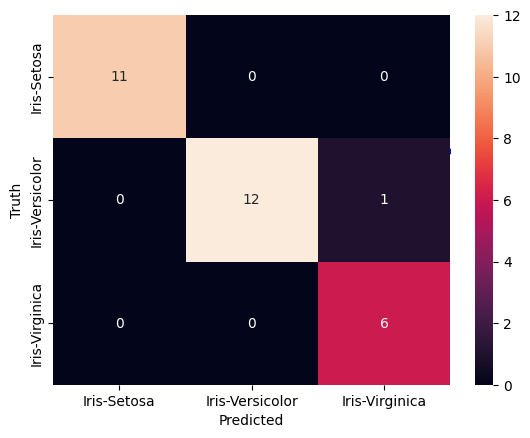

<Figure size 1000x700 with 0 Axes>

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names
iris.target_names
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()
df['target'] = iris.target
df.head()
df[df.target==1].head()
df[df.target==2].head()
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
print(df.to_string())
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]
import matplotlib.pyplot as plt
#matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
len(X_train)
len(X_test)
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)
knn.predict([[4.8,3.0,1.5,0.3]])
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm
import matplotlib.pyplot as plt
import seaborn as sn
ax=plt.subplot()
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,fmt='g',ax=ax) # #annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set_xlabel('Predicted')
ax.set_ylabel('Truth')
ax.xaxis.set_ticklabels(['Iris-Setosa', 'Iris-Versicolor','Iris-Virginica']); 
ax.yaxis.set_ticklabels(['Iris-Setosa', 'Iris-Versicolor','Iris-Virginica']);